## 정적 자산배분: 올웨더 포트폴리오
자산배분은 포트폴리오 내에 다양한 자산에 분산 투자하여 위험을 줄이고 일정수준의 수익률 달성하고자 하는 방법이다. 이러한 자산 배분은 크게 '정적 자산배분'과 '동적 자산배분'으로 나뉜다.

정적 자산배분은 주식과 채권 등 자산에 대한 비중을 어떠한 시장 상황에서도 6:4 혹은 8:2로 배분하고 유지하는 전략이다. 대표적인 정적 자산배분 전략은 레이 달리오가 운용하는 기법으로 유명해진 올웨더 포트폴리오가 있다. 레이 달리오는 세계 최대 헤지펀드인 브릿지워터(Bridgewater Associate)의 설립자이다. 그는 시시각각 변화는 경제 상황속에서 어떻게 자산배분을 해도 견딜수 있는 포트폴리오를 구상하였으며, 이것이 올웨더 포트폴리오다. 경제환경은 크게 경제 성장률과 물가 상승률로 나눌 수 있으며, 각 국면마다 우수한 성과를 보이는 자산은 다르다.

{figure}
---
name: allweather
---
### 경제환경의 구분
1. 경제 성장률이 높은 구간에서는 위험 자산의 성과가 우수하다.
2. 경제 성장률이 낮은 구간에서는 채권의 성과가 우수하다.
3. 물가 상승률이 높은 구간에서는 원자재나 신흥국 채권의 성과가 우수다.
4. 물가 상승률이 낮은 구간에서는 주식과 채권의 성과가 우수하다.
올웨더 포트폴리오는 네 가지 상황 중 하나를 예측하기 보다는, 각각의 상황에 맞는 자산을 모두 포트폴리오에 담아 미리 대비한다. 
또한 각 상황이 올 확률이 25%씩 같다고 가정할 경우, 자산별 투자비중은 {numref}aw와 같다.

{figure}
---
name: aw
---
올웨더 포트폴리오 투자 비중

올웨더 포트폴리오의 투자 비중을 이용해 백테스트를 해보도록 하겠다.

In [2]:
import bt
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = bt.get('SPY, TLT, IEF, GLD, DBC', start='2021-01-02').dropna()
data.head()

,spy,tlt,ief,gld,dbc
Date,,,,,
2021-01-04,355.446747,149.660446,115.533386,182.330002,14.532256
2021-01-05,357.894867,148.548950,115.263763,182.869995,14.939795
2021-01-06,360.034515,145.499481,114.589691,179.899994,14.959676
2021-01-07,365.383759,144.217056,114.185265,179.479996,15.029255
2021-01-08,367.465607,143.751556,113.857872,173.339996,15.148535


## All-Weather 전략 
- WeighSpecified( SPY=0.3, TLT=0.4, IEF=0.15, GLD=0.075, DBC=0.075)
- RunQuaterly
- Rebalance

In [27]:
aw = bt.Strategy('All Weather', [
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(SPY=0.3, TLT=0.4, IEF=0.15, GLD=0.075, DBC=0.075),
    bt.algos.RunQuarterly(),
    bt.algos.Rebalance()
])

### 백테스트 실행 및 결과 출력

In [36]:
aw_backtest = bt.Backtest(aw, data)
aw_result = bt.run(aw_backtest)

aw_result.plot(figsize=(10, 6), title='All Weather', legend=False)
plt.show()

Exception: Cannot allocate capital to SPY because price is 0 as of 2021-01-04 00:00:00

In [31]:
import pandas as pd
data.to_csv("data_bt.csv", encoding="utf-8-sig", index=False)

In [34]:
pd.read_csv("data_bt.csv", encoding="utf-8-sig")

,spy,tlt,ief,gld,dbc
0,355.446747,149.660446,115.533386,182.330002,14.532256
1,357.894867,148.548950,115.263763,182.869995,14.939795
2,360.034515,145.499481,114.589691,179.899994,14.959676
3,365.383759,144.217056,114.185265,179.479996,15.029255
4,367.465607,143.751556,113.857872,173.339996,15.148535
...,...,...,...,...,...
622,431.440002,103.440002,97.339996,178.509995,22.940001
623,436.170013,103.169998,97.000000,177.690002,22.570000
624,436.390015,103.610001,97.389999,177.279999,22.500000
625,438.109985,101.739998,96.389999,177.089996,22.510000


- price 데이터 중 주식(SPY), 장기채(TLT), 중기채(IEF), 금(GLD), 원자재(DBC)에 해당하는 데이터만 선택한다.
- 전략을 정의해주며, bt.algos.WeighSpecified()에 각 자산별 비중을 직접 입력한다. 또한 bt.algos.RunQuarterly()를 통해 분기별 리밸런싱을 정의한다.

- 백테스트를 생성 및 실행한다.

- 이번에는 비중을 살펴보자.

In [35]:
from matplotlib import cm

ax = aw_result.get_security_weights().plot.area(figsize=(10, 6),
                                                ylim=[0, 1],
                                                legend=False,
                                                colormap=cm.jet)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles),
           reversed(labels),
           loc='lower right',
           bbox_to_anchor=(1.15, 0))
plt.show()

NameError: name 'aw_result' is not defined

-분기 별로 리밸런싱이 이루어짐에 따라, 각 자산별 투자비중이 일정하게 유지된다. 마지막으로 성과 중 주요 지표를 확인해보자.



In [39]:
aw_result.stats.loc[[
    'total_return', 'cagr', 'daily_vol', 'max_drawdown', 'calmar', 'daily_sharpe'
]]  # 성과 지표중 total_return, cagr, daily_vol... 등만 골라서 확인 가능 / stats함수에서 [[list]]안에 있는 loc 만 찾아서 출력

NameError: name 'aw_result' is not defined

## 동적 자산배분
정적 자산배분이 자산 별 일정 비중을 유지하는 전략이라면, 동적 자산배분은 시장 상황에 따라 투자하는 대상과 비중을 계속해서 변경하는 전략이다. 여러 경제 상황에서 상대적으로 유리한 자산은 좋은 성과를 보일 것이며, 경제 국면은 장기간 지속되는 추세가 있으므로 모멘텀이 있는 자산에 투자하는 것이 현명한 방법일 수 있다. 모멘텀을 이용한 동적 자산배분 포트폴리오의 예시는 다음과 같다.

1. 글로벌 10개 자산 중 과거 12개월 수익률이 높은 5개 자산을 선택한다.
2. 위험균형 포트폴리오를 구성한다.
3. 매월 말 리밸런싱을 실시한다.
10개 자산에서 과거 수익률 기준 5개 자산만 선택하는 이유는 모멘텀 효과를 얻기 위해서다.
{numref}mom_rank는 글로벌 10개 자산의 과거 6개월 수익률을 기준으로 순위를 매기고, 각 순위 별로 다음 월의 수익률이 상위 50%가 될 확률을 구한 값이다. 수익률이 높은 1~5위 까지의 자산은 다음 월에도 수익률이 높을 확률이 50%가 넘지만, 수익률이 낮은 6~10위 까지의 자산은 다음 월에 수익률이 높을 확률이 50%가 되지 않는다. 따라서 자산군 간에도 모멘텀 효과가 존재하며, 이를 활용하기 위해 모멘텀 상위 자산만을 선택해 투자한다.

{figure}
---
name: mom_rank
---
자산군 내 모멘텀 효과
또한 위험균형 포트폴리오를 이용해 변동성이 지나치게 큰 자산에 의해 포트폴리오의 수익률이 크게 영향받는 일을 줄이고, 최대한 안정적인 포트폴리오를 구성한다. 동적 자산배분의 로직이 다소 복잡해 보이지만, bt 패키지에 내장된 함수를 이용할 경우 역시나 매우 손쉽게 백테스트 할 수 있다.

In [41]:
import bt
import matplotlib.pyplot as plt
import pandas as pd

# data = bt.get('SPY, TLT, IEF, GLD, DBC', start='2021-01-02').dropna()
# data.head()



### 글로벌 동적자산배분전략 GDAA

In [42]:
gdaa = bt.Strategy('GDAA', [
    bt.algos.SelectAll(),
    bt.algos.SelectMomentum(n=5, lookback=pd.DateOffset(years=1)),
    bt.algos.WeighERC(lookback=pd.DateOffset(years=1)),
    bt.algos.RunMonthly(),    
    bt.algos.Rebalance()
])

### 백테스트 및 출력

C:\Users\com\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\com\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\com\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\com\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\com\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\com\anaconda3\li

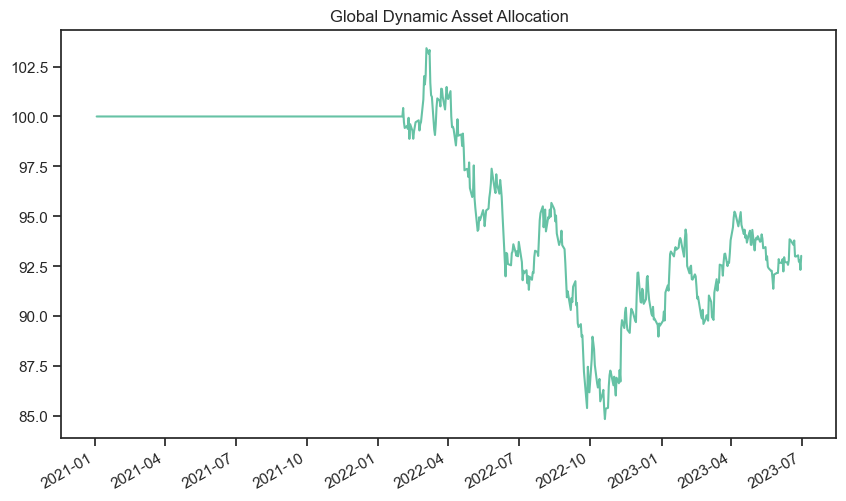

In [44]:
gdaa_backtest = bt.Backtest(gdaa, data)
gdaa_result = bt.run(gdaa_backtest)

gdaa_result.plot(figsize=(10, 6),
                 title='Global Dynamic Asset Allocation',
                 legend=False)
plt.show()

1. bt.Strategy() 내에 전략을 정의해준다.
- bt.algos.SelectAll(): 전체 데이터를 선택한다.
- bt.algos.SelectMomentum(n=5, lookback=pd.DateOffset(years=1)): 모멘텀 상위 종목을 선택하며 갯수는 5개, 모멘텀 관측 기간은 과거 1년으로 한다.
- bt.algos.WeighERC(lookback = pd.DateOffset(years=1)): ERC 즉 위험균형 포트폴리오를 구성하며, 분산-공분산 계산을 위한 수익률은 과거 1년 데이터를 이용한다.
- bt.algos.RunMonthly(): 매월 리밸런싱을 실시한다.
- bt.algos.Rebalance(): 리밸런싱을 정의한다.
2. 백테스트를 생성 및 실행한다.
이처럼 algos 모듈 내의 각종 함수를 이용하면 다양한 전략을 손쉽게 정의 및 백테스트 할 수 있다.

{note}
그래프를 살펴보면 처음 1년간은 수익률에 변화가 없으며, 이는 모멘텀 관측을 위한 1년 간은 투자를 할 수 없기 때문이다. 성과를 평가할 때는 이처럼 투자가 이루어지지 않는 기간을 제외하고 실제 투자가 이루어진 부분부터 평가해야 한다.

## 거래 비용 고려하기
정적 자산배분과는 달리 동적 자산배분은 매 시점마다 투자하는 대상 및 투자비중이 변한다. 비중을 확인해보도록 하자.

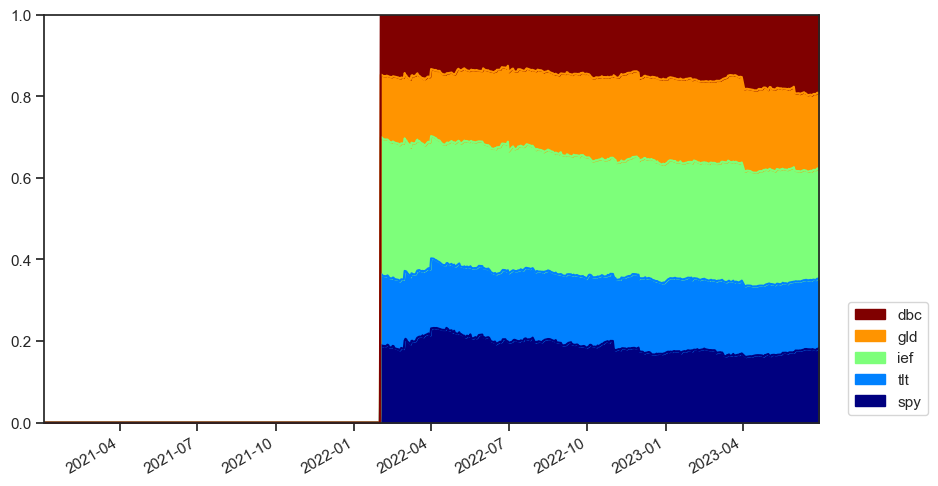

In [46]:
from matplotlib import cm

wt = gdaa_result.get_security_weights().reindex(columns=data.columns)
ax = wt.plot.area(figsize=(10, 6), ylim=[0, 1], legend=False, colormap=cm.jet)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles),
           reversed(labels),
           loc='lower right',
           bbox_to_anchor=(1.15, 0))
plt.show()

기존 정적 자산배분보다 투자 비중의 변화가 상당히 심한것을 확인할 수 있다. 
이는 수익률 상위 5개에 해당하는 자산이 매월 말 바뀌며, 위험균형 포트폴리오를 구성하는 비중이 계속해서 바뀌기 때문이다. 모델 포트폴리오의 경우 이러한 점을 신경쓰지 않지만, 실제 투자에서는 잦은 턴오버로 인한 매매비용, 세금, 기타비용 등이 매우 중요해진다. 
해당 전략의 턴오버를 살펴보도록 하자.

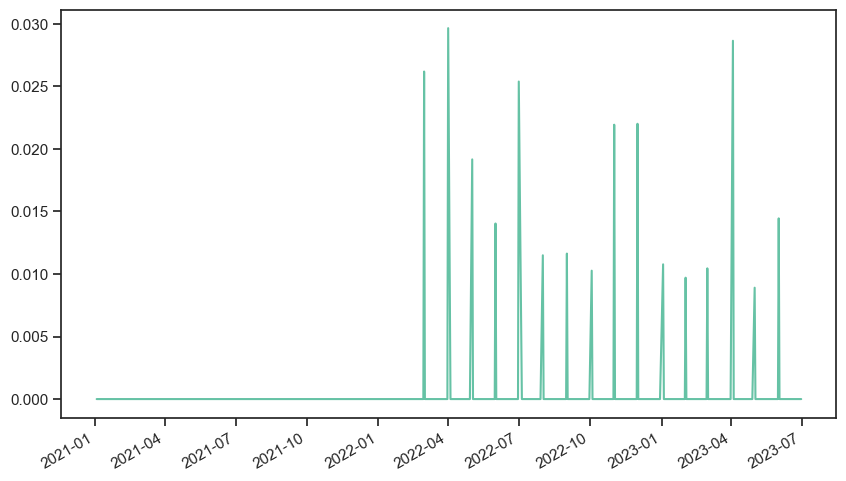

In [47]:
gdaa_backtest.turnover.plot(figsize=(10, 6), legend=False)
plt.show()

생성된 백테스트에서 turnover 메서드를 통해 턴오버를 구할 수 있다. 매월 상당한 턴오버가 발생하므로, 이를 고려한 수익률을 추가로 살펴볼 필요가 있다. 매수 혹은 매도당 발생하는 세금, 수수료, 시장충격 등 총 비용을 0.2%로 가정하여 백테스트를 실행한다.

In [50]:
gdaa_backtest_net = bt.Backtest(gdaa,
                                data,
                                name='GDAA_net',
                                commissions=lambda q, p: abs(q) * p * 0.002)
gdaa_result = bt.run(gdaa_backtest, gdaa_backtest_net) # 2개의 백테스트 결과 출력

C:\Users\com\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\com\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\com\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\com\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\com\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\com\anaconda3\li

1. bt.Backtest() 함수 내에 기존에 정의된 백테스트인 gdaa를 그대로 사용하며, commissions 부분에 수수료를 계산하는 부분을 입력한다. q는 quantity(주수), p는 price(주가)를 의미하며, 즉 총 거래 가격에서 0.2%가 수수료로 나간다고 가정한다.
2. bt.run() 내에 기존에 생성된 백테스트 내용(gdaa_backtest)과 새롭게 생성된 백테스트 내용(gdaa_backtest_net)을 동시에 입력하면, 두 개의 백테스트가 한번에 실행된다.

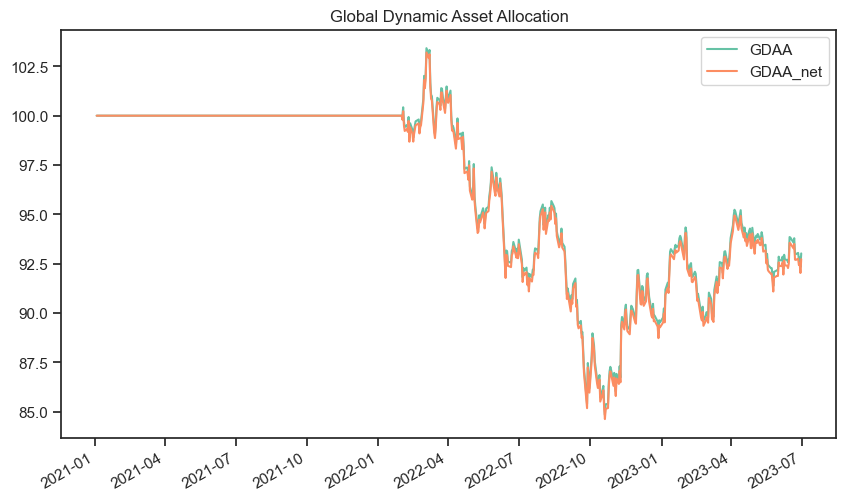

In [49]:
gdaa_result.prices.plot(figsize=(10, 6),
                        title='Global Dynamic Asset Allocation')
plt.show()

기존의 비용을 고려하지 않은 포트폴리오(GDAA)에 비해, 비용을 차감한 포트폴리오(GDAA_net)의 수익률이 시간이 지남에 따라 서서히 감소한다. 모델 포트폴리오와 실제 포트폴리오 수익률 간의 차이는 매매시 비용이 크거나 턴오버가 높을수록 더욱 벌어지므로, 실제 매매에서는 비용과 턴오버를 줄이는 것이 매우 중요하다

### 먼저 전략의 이름(Asset_EW)을 입력한다.
1. bt.algos.SelectAll() 함수를 통해 모든 데이터를 사용함을 정의한다.
2. bt.algos.WeighEqually() 함수를 통해 동일비중으로 투자할 것을 정의한다.
3. bt.algos.RunMonthly() 함수를 통해 매월말 리밸런싱 함을 정의한다.
4. bt.algos.Rebalance() 함수를 통해 계산된 비중에 따라 리밸런싱 함을 정의한다.
이 외에 algos 모듈을 통해 다양한 백테스트 로직을 정의할 수 있으며, 자세한 내용은 아래 사이트에서 확인할 수 있다.

- https://pmorissette.github.io/bt/bt.html#module-bt.algos

### 전략의 백테스트
앞에서 정의된 내용을 바탕으로 백테스트를 실행한다.

1. 가격 데이터 중 ETF의 시작 시점이 모두 다르므로, dropna() 함수를 통해 NA를 모두 제거하여 시작시점을 동일하게 만든다.
2. Backtest() 함수를 통해 백테스트를 생성할 수 있으며, 앞에서 정의한 백테스트 정의(strategy)와 가격 데이터(data)를 입력한다.
3. run() 함수를 통해 백테스트를 실행하며, 앞에서 생성된 백테스트(backtest)를 입력한다.

In [4]:
data_bt = data.dropna()

# 백테스트 생성
backtest = bt.Backtest(strategy, data)

# 백테스트 실행
result = bt.run(backtest)

In [5]:
result.prices
# 백테스트 결과에서 prices를 입력하면 누적수익률이 데이터프레임 형태로 나타나며, 시작시점을 100으로 환산하여 계산된다.

,Asset_EW
2020-01-01,100.000000
2020-01-02,100.000000
2020-01-03,98.616540
2020-01-06,97.976446
2020-01-07,98.959696
...,...
2023-06-26,167.882739
2023-06-27,173.242782
2023-06-28,172.306258
2023-06-29,171.806183


In [6]:
result.prices.to_returns() # prices에 추가로 to_returns()를 입력하면, 수익률이 계산된다.

,Asset_EW
2020-01-01,NaN
2020-01-02,0.000000
2020-01-03,-0.013835
2020-01-06,-0.006491
2020-01-07,0.010036
...,...
2023-06-26,-0.001955
2023-06-27,0.031927
2023-06-28,-0.005406
2023-06-29,-0.002902


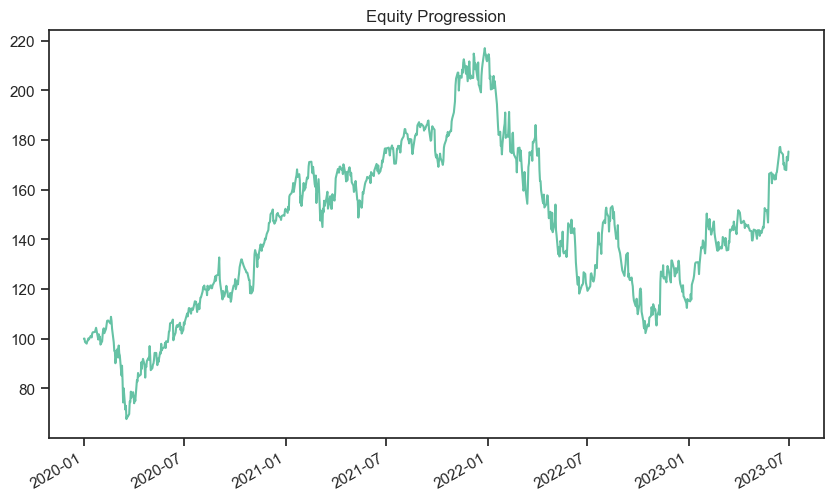

In [7]:
# 누적수익률 그래프

import matplotlib.pyplot as plt
%matplotlib inline

result.plot(figsize=(10, 6), legend=False)
plt.show()

In [8]:
# 종목별 투자비중
result.get_security_weights().head()

,spy,qqq,soxl,tlt
2020-01-01,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.249896,0.249832,0.249994,0.249964
2020-01-03,0.251483,0.251017,0.239808,0.257374
2020-01-06,0.254092,0.254284,0.233719,0.257585
2020-01-07,0.250860,0.251723,0.243329,0.253772


1. area()를 통해 면적 그래프를 나타내며, 
2. 축의 범위는 0에서 1, 범례(legend)는 제외, 색 구분은 cm.jet을 이용한다.
3. get_legend_handles_labels()를 통해 범례를 받아온다.
4. 좌우 마진을 0으로 둔다.
5. legend() 함수를 통해 범례를 나타내며, 그래프와 색 순서를 맞추기 위해 reversed()를 통해 순서를 바꾼다. 또한 위치는 오른쪽 아래(lower right)의 (1.15, 0) 지점으로 한다.
6. 그림을 나타낸다.
- 매월 말 리밸런싱을 하므로, 대부분의 구간에서 모든 자산에 10%씩 균등하게 투자된다. 이번에는 각종 성과지표를 확인해보도록 하자.

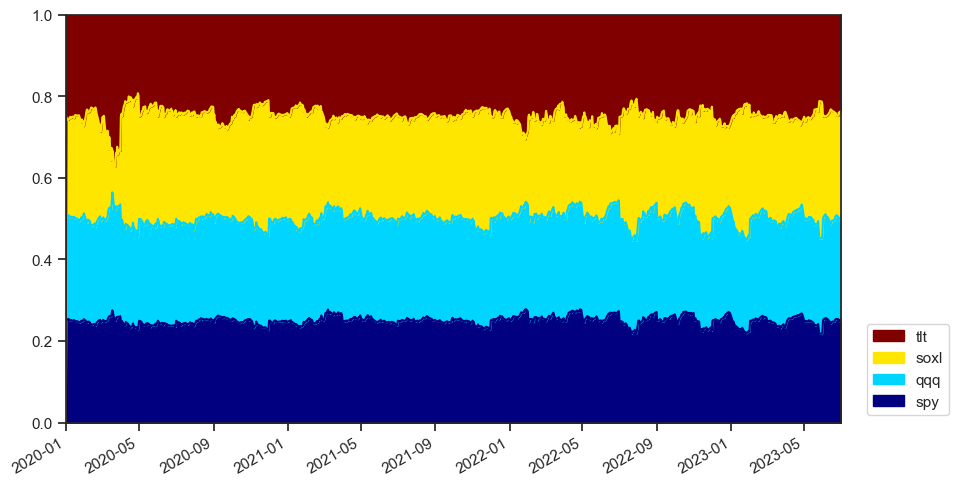

In [9]:
from matplotlib import cm

ax = result.get_security_weights().plot.area(figsize=(10, 6),
                                             ylim=[0, 1],
                                             legend=False,
                                             colormap=cm.jet)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles),
           reversed(labels),
           loc='lower right',
           bbox_to_anchor=(1.15, 0))
plt.show()

### display() 메서드를 통해 각종 성과 측정치를 구할 수 있다. 각 지표가 의미하는 바는 다음과 같다.
- Start; 시작일
- End: 종료일
- Risk-free rate: 무위험 수익률
- Total Return: 총 수익률
- Sharpe: 샤프지수 (평균 수익률/변동성)
- Sortino: 소티노지수 (평균 수익률/마이너스 수익률의 변동성)
- CAGR: 연평균 수익률
- Max drawdown: 최대 손실률 (MDD)
- Calmar Ratio: 칼마지수 (수익률/MDD)
- MTD / 3m / 6m / YTD: 금월, 3개월, 6개월, 올해 수익률
- 1Y / 3Y (ann.) / 5Y (ann.) / 10Y (ann.): 1년 / 3년 / 5년 / 10년 기준 연율화 수익률
- Since Incep. (ann): 시작 이후 연율화 수익률
- Mean (ann.): 연평균 수익률
- Vol (ann.): 연평균 변동성
- Skew: 왜도
- Kurt: 첨도
- Best: 최고 수익률
- Worst: 최저 수익률
- Avg. Drawdown: 손실(Drawdown)의 평균
- Avg. Drawdown Days: 손실(Drawdown) 발생 후 회복까지 평균일수
- Avg. Up Month: 상승한 달의 평균 수익률
- Avg. Down Month: 하락한 달의 평균 수익률
- Win Year %: 연도별 양의 수익률을 기록할 확률
- Win 12m %: 12개월 투자했을 시 양의 수익률을 기록할 확률

In [10]:
result.display()

Stat                 Asset_EW
-------------------  ----------
Start                2020-01-01
End                  2023-06-30
Risk-free rate       0.00%

Total Return         75.37%
Daily Sharpe         0.61
Daily Sortino        1.01
CAGR                 17.44%
Max Drawdown         -52.90%
Calmar Ratio         0.33

MTD                  7.87%
3m                   17.49%
6m                   51.84%
YTD                  51.84%
1Y                   45.45%
3Y (ann.)            18.11%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  17.44%

Daily Sharpe         0.61
Daily Sortino        1.01
Daily Mean (ann.)    23.67%
Daily Vol (ann.)     38.90%
Daily Skew           -0.13
Daily Kurt           2.07
Best Day             12.07%
Worst Day            -10.77%

Monthly Sharpe       0.65
Monthly Sortino      1.21
Monthly Mean (ann.)  23.88%
Monthly Vol (ann.)   36.87%
Monthly Skew         -0.06
Monthly Kurt         -0.36
Best Month           21.69%
Worst Month          -19.00%

Y